        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Spring 2022</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [1]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 462 kB 4.3 MB/s 


You can also check the version of it using the following code.

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

Now, it's time to load the dataset

In [3]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [4]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

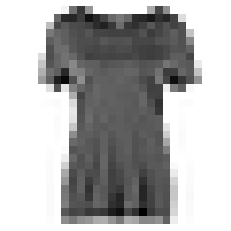

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [ ]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


***Reshaping the Train and Test data***

In [7]:
X_train =  X_train.reshape(60000,784)      #training data and test data are converted to 2D from 3D
X_test = X_test.reshape(10000,784) 

Now, it's your turn,

***MODEL-1***
***Logistic Regression ***

In [8]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=100)
logmodel.fit(X_train,y_train)
y_test_hat=logmodel.predict(X_test)
y_train_hat=logmodel.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


***Finding the accuracy,F1,Precision,Recall values***

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Logistic Regression")
print("In sample accuracy:",accuracy_score(y_train,y_train_hat,normalize = True) * 100)
print("Out sample accuracy:",accuracy_score(y_test,y_test_hat,normalize = True) * 100)
print(classification_report(y_test,y_test_hat))

Logistic Regression
In sample accuracy: 86.32
Out sample accuracy: 84.11999999999999
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.64      0.55      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



***Finding the AUC score of Logistic Regression***

In [10]:
from sklearn.metrics import roc_auc_score
log_auc=roc_auc_score(y_test,logmodel.predict_proba(X_test), multi_class="ovr", average="macro")
print("Auc score is:{:.3f}".format(log_auc),'\n')

Auc score is:0.983 



***MODEL-2***
***Descision Tree***

***Finding the ideal parameter and cross Validation score.***

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

decisiontree_model = DecisionTreeClassifier()

par_grid = {'max_depth':[2,3,4,5,6,7,8,9,10]}                   #For choosing the parameters
cv = StratifiedKFold(n_splits=5, random_state=0,shuffle=True)      #We have choosen 5 splits for stratifiedKfolds
grid = GridSearchCV(decisiontree_model,par_grid, cv =cv ,scoring='accuracy',return_train_score=True) #we used gridsearch to find the best hyperparameters for DT
grid.fit(X_train,y_train)                                          
print("ideal parameter:{}".format(grid.best_params_))
print("cross validation score:{}",format(grid.best_score_))

ideal parameter:{'max_depth': 10}
cross validation score:{} 0.8108333333333333


***Finding the accuracy ,F1 ,Precision ,Recall values***

In [12]:
model=grid.best_estimator_
y_train_hat_1=model.predict(X_train)
y_test_hat_1=model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Descision Tree")
print("In sample accuracy:",accuracy_score(y_train,y_train_hat_1,normalize = True) * 100)
print("Out sample accuracy:",accuracy_score(y_test,y_test_hat_1,normalize = True) * 100)
print(classification_report(y_test,y_test_hat_1))

Descision Tree
In sample accuracy: 85.14833333333334
Out sample accuracy: 80.08999999999999
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1000
           1       0.97      0.92      0.95      1000
           2       0.65      0.67      0.66      1000
           3       0.82      0.81      0.82      1000
           4       0.60      0.73      0.66      1000
           5       0.93      0.87      0.90      1000
           6       0.57      0.50      0.53      1000
           7       0.87      0.93      0.90      1000
           8       0.93      0.90      0.91      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



***MODEL-3***
***KNN(K-Nearest Neighbors) ***

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train, y_train)

KNeighborsClassifier()

***Finding the accuracy ,F1 ,Precision ,Recall values***

In [14]:
y_test_hat_2= knnmodel.predict(X_test)
y_train_hat_2= knnmodel.predict(X_train)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("KNN")
print("In sample accuracy:",accuracy_score(y_train,y_train_hat_2,normalize = True) * 100)
print("Out sample accuracy:",accuracy_score(y_test,y_test_hat_2,normalize = True) * 100)
print(classification_report(y_test,y_test_hat_2))

KNN
In sample accuracy: 89.97666666666667
Out sample accuracy: 85.54
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



***MODEL-4***
***Random Forest***

In [15]:
from sklearn.ensemble import RandomForestClassifier
random_f = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=100)  #using tree depth as 10
random_f.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

***Finding the accuracy ,F1 ,Precision ,Recall values***

In [16]:
y_test_hat_3= random_f.predict(X_test)
y_train_hat_3= random_f.predict(X_train)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Random Forest")
print("In sample accuracy:",accuracy_score(y_train,y_train_hat_3,normalize = True) * 100)
print("Out sample accuracy:",accuracy_score(y_test,y_test_hat_3,normalize = True) * 100)
print(classification_report(y_test,y_test_hat_3))

Random Forest
In sample accuracy: 88.31
Out sample accuracy: 84.66
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.99      0.94      0.97      1000
           2       0.71      0.74      0.72      1000
           3       0.83      0.90      0.86      1000
           4       0.69      0.81      0.75      1000
           5       0.98      0.94      0.96      1000
           6       0.71      0.49      0.58      1000
           7       0.90      0.92      0.91      1000
           8       0.95      0.96      0.96      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



***MODEL-5***
***Neural Networks***

In [17]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs',random_state=0)
NN.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(random_state=0, solver='lbfgs')

***Finding the accuracy ,F1 ,Precision ,Recall values***

In [18]:
y_test_hat_4= NN.predict(X_test)
y_train_hat_4= NN.predict(X_train)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Random Forest")
print("In sample accuracy:",accuracy_score(y_train,y_train_hat_4,normalize = True) * 100)
print("Out sample accuracy:",accuracy_score(y_test,y_test_hat_4,normalize = True) * 100)
print(classification_report(y_test,y_test_hat_4))

Random Forest
In sample accuracy: 74.26666666666667
Out sample accuracy: 73.31
              precision    recall  f1-score   support

           0       0.65      0.79      0.72      1000
           1       0.94      0.93      0.93      1000
           2       0.41      0.59      0.48      1000
           3       0.81      0.79      0.80      1000
           4       0.49      0.56      0.52      1000
           5       0.92      0.84      0.88      1000
           6       0.36      0.09      0.14      1000
           7       0.87      0.89      0.88      1000
           8       0.93      0.91      0.92      1000
           9       0.87      0.94      0.90      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



***Interpretation from the above results:***


Accuracy for Logistic regression: 84%

Accuracy for Decision Tree: 80%

Accuracy for KNN: 86%

Accuracy for Random Forest: 85%

Accuracy for Neural Networks: 73%

From all the above models KNN has the highest accuracy i.e 86% which implies it has highest precision and recall.

***TASK 2: In this i'm using my own images and predicting the above models. ***

In [19]:
import numpy as np 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

***Reading all the images i have taken in order to see the prediction of my model***

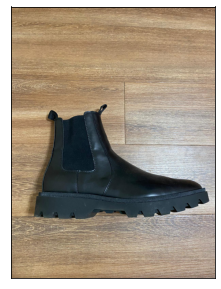

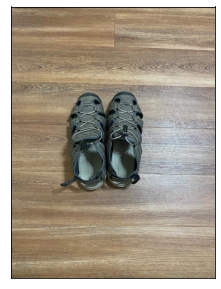

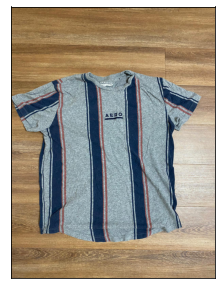

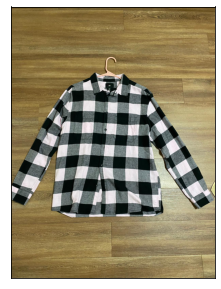

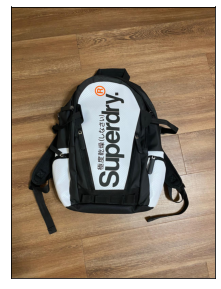

In [31]:
boots=np.array(mpimg.imread("/content/sample_data/Boots.jpeg"))
slipper=np.array(mpimg.imread("/content/sample_data/Slippers.jpeg"))
Tshirt=np.array(mpimg.imread("/content/sample_data/Tshirt.jpeg")) 
shirt=np.array(mpimg.imread("/content/sample_data/shirt.jpeg"))
Bag=np.array(mpimg.imread("/content/sample_data/Bag.jpeg"))

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(boots)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(slipper)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Tshirt)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(shirt)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Bag)
ax.set(xticks=[], yticks=[])
plt.show()

In [32]:
Bag.shape 

(1600, 1200, 3)

In [46]:
pip install Opencv-python #installed Opencv for image processing.

In [47]:
import glob                      #We use glob to search for specific file pattern.
import cv2                        #We use cv2 to read an image.
pictures = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/sample_data/*.jpeg")]
#Using glob the path is fetched and images in that path are convereted to grey scale using cv2.greyscale function.
new_pictures=[]              #empty array 
for img in pictures:             #using for loop to access each image in the file
    resized_down = cv2.resize(img, (28,28), interpolation= cv2.INTER_LINEAR)        #aligning all the images side by side
    new_pictures.append(resized_down)             #appending all the images to the empty array.
grey_images=new_pictures                        

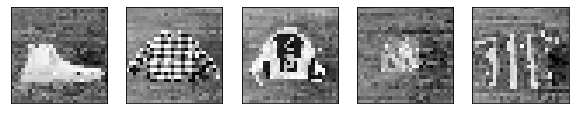

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


In [49]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)             #Printing all the images in the given fig size.
    plt.xticks([])        
    plt.yticks([])
    plt.grid(False)
    plt.imshow(grey_images[i], cmap=plt.cm.binary)
    
plt.show()
number_img = []
for data in range(len(grey_images)):
    number_img.append(grey_images[data].reshape(28,28))   #resizing the image to (28,28)
    print(number_img[data].shape)

In [36]:
len(number_img)
imagearray=np.array(number_img)
print(imagearray.shape)          #Printing the length and shape of new array.

(5, 28, 28)


In [37]:
number_of_columns=imagearray[1].shape[0]*imagearray[1].shape[1]
print(number_of_columns)

784


In [38]:
imagearray=imagearray.astype('float32')
imagearray /=255.0
print(imagearray.shape)

(5, 28, 28)


In [39]:
imagearray=imagearray.reshape(5,28*28) #Reshaping the array
imagearray.shape

(5, 784)

***Using Knn(K-Nearest Neighbors) as it had the highest out-sample accuracy i.e 86% to predict my images.***


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_p=knnmodel.predict(imagearray)
print(knn_p)

[6 6 6 6 6]


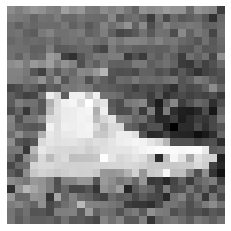

The predicted name of the above image is : Shirt


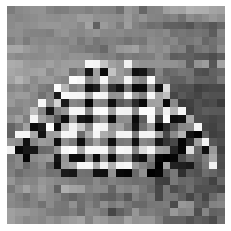

The predicted name of the above image is : Shirt


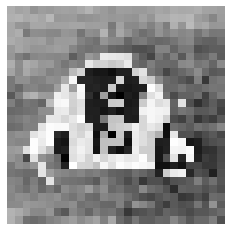

The predicted name of the above image is : Shirt


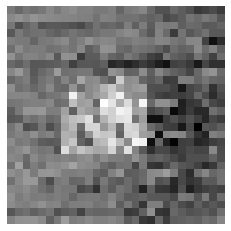

The predicted name of the above image is : Shirt


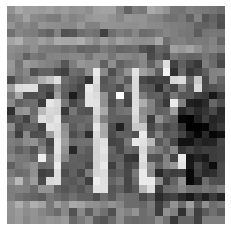

The predicted name of the above image is : Shirt


In [44]:
i=0
for i in range(5):
    a=imagearray[i]
    array_new=a.reshape(28,28)
    plt.imshow(array_new,cmap='binary')
    plt.axis('off')
    plt.show()
    y_new=knn_p[i]                      #Using KNN model to predict the name of the item in the image
    print("The predicted name of the above image is :",class_names[y_new])
    i=i+1

***Using Random forest to predict the images names as it had the second highest out-sample accuracy i.e 85%***

In [42]:
from sklearn.ensemble import RandomForestClassifier
Randomf_p=random_f.predict(imagearray)
print(Randomf_p)

[5 5 5 5 5]


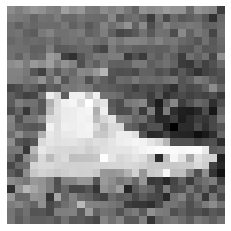

The predicted name of the above image is : Sandal


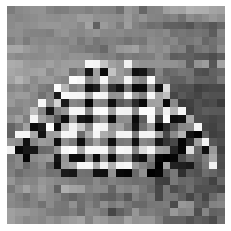

The predicted name of the above image is : Sandal


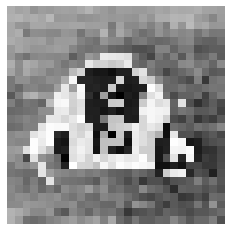

The predicted name of the above image is : Sandal


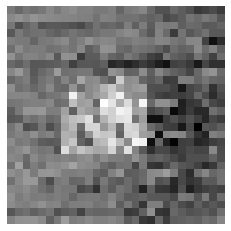

The predicted name of the above image is : Sandal


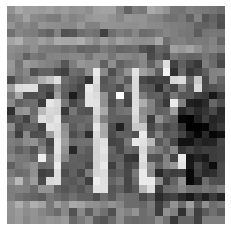

The predicted name of the above image is : Sandal


In [45]:
i=0
for i in range(5):
    a=imagearray[i]
    array_new=a.reshape(28,28)
    plt.imshow(array_new,cmap='binary')
    plt.axis('off')
    plt.show()
    y_new_1=Randomf_p[i]  #Using random forest model to predict the name of the item in the image.
    print("The predicted name of the above image is :",class_names[y_new_1])
    i=i+1

***After using my best models to predict the name of the fashion item this is what i have interpreted:***

***I imported my own 5 fashion images then resized, grayscaled and reshaped the 5 images, after all the defined steps, used images for prediction.***

***First i have used the best models from all the different models i have trained and tested. i used KNN as it had highest out-sample accuracy then all the other models which means the it had the best accuracy to predict or forecast new data. After using the KNN model on the grey scale images.It predicted 1 out of 5 images which was shirt.***

***After that, I have used my second best model i.e Random forest which had the second highest out-sample accuracy.after using the Random forest model on the greyscale images .it predicted 1 out of 5 images which was sandal.***

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Apr 5 2022 at 7:00 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>